<a href="https://colab.research.google.com/github/brenoakihiromorimoto/portf-lio/blob/main/Desafio_Conta_Azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Conta Azul**

## Sobre a Conta Azul



A Conta Azul é movida pela crença que todo empreendedor merece ter sucesso. Apesar do dia a dia cheio de responsabilidades, queremos que todo dono de um pequeno negócio consiga tempo para se dedicar ao que sempre sonhou quando decidiu abrir uma empresa. Por isso, usamos a tecnologia para criar uma plataforma em nuvem, onde o empreendedor juntamente com o seu contador, de forma simples e fácil, podem encontrar tudo o que precisam em tempo real. 

Para saber mais entre em nosso site: [https://contaazul.com/](https://contaazul.com/)


## Contexto do desafio



Atualmente o modelo de negocio da Conta Azul depende, em parte, do que chamamos de receita recorrente, isto envolve todos os contratos mensais, trimestrais ou anuais que temos com pequenas e médias empresas que utilizam nosso sistema de ERP. Mesmo que o churn atualmente seja considerado baixo, ele ainda é responsável por uma perda considerável de receita anual.

Segue abaixo o fluxo seguido pelos clientes no momento do churn:
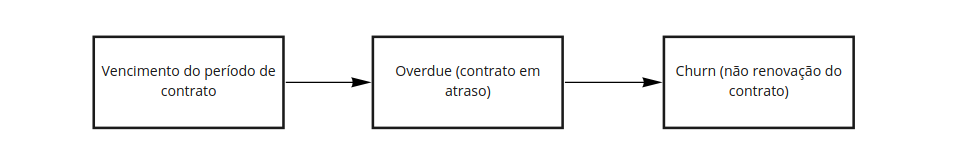

Portanto, muitas vezes quando o cliente chega neste estágio, é difícil reverter o cenário, o cliente já está desengajado. O ideal seria identificarmos o potencial churn com certa antecedência, até mesmo o entendimento a respeito de quais aspectos do comportamento ou das caractarísticas que influenciam o churn podem ser valiosas para o negócio.

## Análise exploratória

Esta é a etapa onde você consegue compartilhar o seu raciocínio analítico conosco, portanto aproveite este etapa e não esqueça de deixar explícito:
*   Os insights e questionamentos que surgirem de sua análise exploratória.
*   Para cada gráfico plotado, o que foi observado.
*   Como a análise exploratória te ajudou a escolher as variáveis para o seu modelo.

## Modelagem e Machine learning

Nesta etapa você vai desenhar a modelagem e realizar a construção do seu modelo de machine learning que permita a criação de um produto que dê margem de ação preventiva e proativa para a área de negócios. É muito importante que você deixe bem estruturado e documentado sua linha de raciocínio, com anotações e descrições de cada passo deste processo.

## Escolha das métricas

Justifique quais métricas você escolheu para avaliar sua solução. Nesta etapa do desafio é importante que você deixe claro qual a criticidade e conceitos que suportam a sua decisão.

## Interpretação do output

Nesta etapa você deve deixar claro como os outputs da sua solução podem ser interpretados. Aqui também é o espaço para você conseguir trazer insights interessantes que podem ser transmitidos para a área de negócios.

## Efeito

Nesta etapa do desafio, considere que a sua solução virou um produto que pode ser utilizado pelos times de engajamento e retenção da Conta Azul. Este produto será uma lista de todos os clientes da Conta Azul com a propensão ao churn de cada um. Essa lista independe da data de vencimento do contrato, que é o principal momento onde ocorre o churn, e da probabilidade de chance de churn obtido com o algoritmo que você criou. Essa lista será compartilhada com a área de negócios, que a utilizará para desenhar e implementar ações visando diminuir o churn.

Dentro deste contexto, sua tarefa é desenhar dois experimentos que consigam trazer clareza a respeito do impacto da nossa solução. Considere que as tratativas para o churn podem ser, por exemplo, dar um desconto para o cliente, fornecer treinamento sobre a plataforma ou ter um acionamento da equipe de relacionamento com o cliente.


**Primeiro experimento**

Para este estudo, considere que é possível controlar quais as tratativas serão utilizadas, quando e para quais clientes elas serão direcionadas.


**Segundo experimento**

Para este estudo, considere que teremos três tipos de tratativas para o churn e a decisão de quando e para quais clientes utilizar cada uma é da área de negócio.

Além do cenário de cada experimento, considere que não existem limitações a respeito do que pode ser feito. Deixe registrado e documentado a decisão de cada passo adotado para cada experimento, pois é importante que a sua linha de raciocínio fique clara e que o estudo esteja documentado de forma replicável por outros colegas do seu time.



## **Bases de dados**

https://docs.google.com/spreadsheets/d/1qU9oeYgrrpXGAiqiB9jZ_uQgoXxEuRLVU9iPj83UTkw/edit?usp=sharing

# Importar Bibliotecas

In [ ]:
# Bibliotecas de manipulação e visualização de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.classifier import ROCAUC, classification_report
from scipy.stats import chi2_contingency
from sklearn.metrics import plot_roc_curve

# Google Drive
from google.colab import drive
drive.mount('/gdrive')
# Sincronizar o Drive com o google colab
%cd /gdrive

# Pré-processamento
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, Normalizer
!pip install category_encoders
import category_encoders as ce

# Balanceamento de dataset
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Modelos de machine learning e train test split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Métricas de classificação
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

# Cross validation
from sklearn.model_selection import cross_val_predict

Mounted at /gdrive
/gdrive
     |████████████████████████████████| 86 kB 3.4 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Funções

In [ ]:
# V de Cramer para analisar a força de associação entre variáveis.
def cramers_V(var1, var2):
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)
  return (stat/(obs*mini))

def preprocessing(X_train, X_val, y_train, y_val, var_numerica, var_categorica):
  # Transformar variáveis numéricas
  X_train[var_numerica] = X_train[var_numerica].replace('[R$,]', '', regex=True).astype(float)
  X_val[var_numerica] = X_val[var_numerica].replace('[R$,]', '', regex=True).astype(float)

  # Normalizar as variáveis numéricas
  #min_max_scaler = MinMaxScaler()
  #X_train[var_numerica] = min_max_scaler.fit_transform(X_train[var_numerica])
  #X_val[var_numerica] = min_max_scaler.fit_transform(X_val[var_numerica])

  # Transformar variáveis categóricas por LabelEncoder
  label_encoder = LabelEncoder()
  for var in var_categorica:
    X_train[var] = label_encoder.fit_transform(X_train[var]).astype('float64')
    X_val[var] = label_encoder.fit_transform(X_val[var]).astype('float64')
    y_train = label_encoder.fit_transform(y_train).astype('float64')
    y_val = label_encoder.fit_transform(y_val).astype('float64')

  # Imputar variáveis numéricas faltantes
  si_median = SimpleImputer(strategy='median')
  X_train[var_numerica] = si_median.fit_transform(X_train[var_numerica])
  X_val[var_numerica] = si_median.fit_transform(X_val[var_numerica])

  # Imputar variáveis categóricas faltantes
  si_frequent = SimpleImputer(strategy='most_frequent')
  X_train[var_categorica] = si_frequent.fit_transform(X_train[var_categorica])
  X_val[var_categorica] = si_frequent.fit_transform(X_val[var_categorica])

  return X_train, X_val, y_train, y_val

# Função de resultados
def resultado(modelo, y_val, previsao): 
    data = {'Modelo': [modelo],
            'Accuracy': [accuracy_score(y_val, previsao).round(2)],
            'Precision': [precision_score(y_val, previsao).round(2)],
            'Recall': [recall_score(y_val, previsao).round(2)],
            'F1-Score': [f1_score(y_val, previsao).round(2)]}
    # Matriz de confusão
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(confusion_matrix(y_val, previsao), annot=True)
    return data

# Balanceamento de dataset
def oversampler(X_train, y_train, sampling_strategy=0.5):
  # Balancear dataset X_train e y_train
  XR, yR = RandomOverSampler(random_state=0, sampling_strategy=sampling_strategy).fit_resample(X_train, y_train)
  X_rsamp = pd.DataFrame(columns=X_train.columns, data=XR)
  y_rsamp = pd.DataFrame(data=yR)

  return X_rsamp, y_rsamp

# DataFrame de resultados 
def output_test(previsao_prob):
  y_pred_test = previsao_prob[:, 1]
  output_test = pd.DataFrame(
      index=[f'empresa_{n+1:03d}' for n in range(y_pred_test.shape[0])],
      data={
          'probabilidade': y_pred_test,
          'decisão': (y_pred_test > 0.5).astype(int),
          'target': y_val.ravel(),
      }
  )
  return output_test

  #Daraframe de resultados para cross validation
def output_test_full(previsao_prob, y_cross_validation):
    y_pred_test = previsao_prob[:, 1]
    output_test = pd.DataFrame(
        index=[f'empresa_{n+1:03d}' for n in range(y_pred_test.shape[0])],
        data={
            'probabilidade': y_pred_test,
            'decisão': (y_pred_test > 0.5).astype(int),
            'target': y_cross_validation.ravel(),
        }
    )
    return output_test

# Histograma das probabilidades de churn.
def output_histograma(output_test, threshold=0.5):
  bins=20
  alpha=0.4
  linewidth=0

  plt.figure(figsize=(15, 10))
  sns.histplot(
      output_test.loc[output_test['target'] == 0, 'probabilidade'],
      bins=bins, color='green', alpha=alpha, linewidth=linewidth, label='target=Sem Churn', stat='probability'
  )
  sns.histplot(
      output_test.loc[output_test['target'] == 1, 'probabilidade'], 
      bins=bins, color='red', alpha=alpha, linewidth=linewidth, label='target=Churn', stat='probability'
  )
  plt.axvline(threshold, ls='--', color='#333333', label='decisão (threshold >= 50%)')
  plt.xlabel('Probabilidade p/ Churn', fontdict={'size': 12})
  plt.ylabel('Contagem', fontdict={'size': 12})
  plt.title('Estimativas - Massa de Treino', fontdict={'size': 12})
  plt.grid(True)
  plt.legend();

# Calcular o far (false acceptance rate) e frr (false rejection rate)
def calculate_far_frr(y_proba, y_true, n_points=30, normalize=False, threshold=None):
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_proba[y_true == 0] >= t
        frr_pt = y_proba[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

# gráfico do far e frr
def far_frr_grafico(output_test, threshold=0.5):
  ffdf = calculate_far_frr(output_test['probabilidade'], output_test['target'], n_points=30, normalize=False, threshold=threshold)
  plt.figure(figsize=(15,10))
  ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
  ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
  plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
  plt.grid(True)
  plt.xlim(0, 1)
  plt.ylim(0, ffdf['plot'].max().max())
  plt.xlabel('threshold')
  plt.ylabel('count')
  plt.legend();

# Importar Dataset

In [ ]:
link = '/gdrive/MyDrive/Colab Notebooks/customer_churn_data - customer_churn_data.csv'
df = pd.read_csv(link, sep=',', encoding='utf-8')
X = df.drop('Churn', axis=1)
y = df['Churn']

* **df**: armazena todas as variáveis.
* **X**: armazena todas as variáveis independentes.
* **y**: armazena a variável dependente, neste caso é **Churn**.

# Análise Exploratória de Dados

## Primeiro Contato

In [ ]:
df.head(3)

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,"R$ 29,85","R$ 29,85",Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,"R$ 56,95","R$ 1.889,50",Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,"R$ 53,85","R$ 108,15",Sim


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   ID                                                                                7043 non-null   int64 
 1   Tipo de empresa                                                                   7043 non-null   object
 2   Fundação da empresa                                                               7043 non-null   int64 
 3   Possui mais de um sócio                                                           7043 non-null   object
 4   Funcionários                                                                      7043 non-null   object
 5   Meses de permanência                                                              7043 non-null   int64 
 6   Utiliza 

* A variável 'PossuiContador' apresenta **9,68%** de valores não nulos.
* Apenas 4 features são numéricas:
  * Receita mensal
  * Receita total
  * Meses de permanência
  * Fundação da empresa.

                                               

In [ ]:
((df['Churn'].value_counts()/df['Churn'].value_counts().sum())*100)

Não    73.463013
Sim    26.536987
Name: Churn, dtype: float64

* **26,53%** dos clientes não renovaram o contrato.
* A distribuição da classe minoritária é **levemente** desbalanceada (20-40%).

In [ ]:
df.nunique()

ID                                                                                  7043
Tipo de empresa                                                                        2
Fundação da empresa                                                                   21
Possui mais de um sócio                                                                2
Funcionários                                                                           2
Meses de permanência                                                                  73
Utiliza serviços financeiros                                                           2
PossuiContador                                                                         2
Faz conciliação bancária                                                               3
Frequência de utilização de feature do sistema: Módulo financeiro                      3
Frequência de utilização de feature do sistema: Emissão de nota fiscal                 3
Frequência de utiliza

* O Id é único para cada empresa sem valores duplicados.
* O Churn apresenta dois valores únicos: 0 e 1.
* Receita mensal e receita total apresentam quantidades bem distintas entre valores únicos.

In [ ]:
df.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Tipo de empresa,Possui mais de um sócio,Funcionários,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,Frequência de utilização de feature do sistema: Emissão de nota fiscal,Frequência de utilização de feature do sistema: Integração bancária,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
count,7043,7043,7043,7043,6361,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4,1585,6530,2
top,Pequena empresa,Não,até 5 funcionários,Sim,Não,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,Yes,Boleto - pagamento único,"R$ 20,05","R$ 20,20",Não
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,61,11,5174


* Algumas variáveis me chamaram atenção porque o valor aparece com **frequência superior a 50%**, ou 3521, dos valores totais:
  * Utiliza serviços financeiros
  * Funcionários
  * Emite boletos.1
  * Contrato
  * Possui mais de um sócio
  * Tipo de Empresa

## Análise aprofundada da EDA

In [ ]:
df_EDA = df.copy()

# Retirar Receita total e Receita mensal porque não são categóricas.
df_EDA_categoricas = df_EDA.drop(['Receita mensal', 'Receita total', 'Meses de permanência ', 'Fundação da empresa'], axis=1)

# Filtrar Receita mensal, Receita total, Meses de permanência, Fundação da empresa
df_EDA_numericas = df_EDA[['Receita mensal', 'Receita total', 'Meses de permanência ', 'Fundação da empresa', 'Churn']].copy()

* **df_EDA**: dataset para análise exploratória de dados.
* **df_EDA_categoricas**: dataset  de features categóricas para análise exploratória de dados.
* **df_EDA_numericas**: dataset  de features numericas para análise exploratória de dados.

Quase todas as variáveis são categóricas, o que permite criar uma matriz de V-Cramer para avaliar o quão fortemente as variáveis categóricas estão relacionadas entre si no dataset.

### Análise de variáveis categóricas

#### Tratamento de dados

In [ ]:
df_EDA['Churn'] = df['Churn'].map({'Sim': 1, 'Não': 0})
df_EDA['Receita mensal'] = df['Receita mensal'].replace('[R$,]', '', regex=True).astype(float)
df_EDA['Receita total'] = df['Receita total'].replace('[R$,]', '', regex=True).astype(float)

variaveis_categoricas = [col for col in df_EDA_categoricas]
label_encoder = LabelEncoder()

for var in variaveis_categoricas:
    df_EDA_categoricas[var] = label_encoder.fit_transform(df_EDA_categoricas[var])

#### Matriz de correlação V de Cramer

In [ ]:

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df_EDA_categoricas:
  col = []
  for var2 in df_EDA_categoricas:
    cramers = cramers_V(df_EDA_categoricas[var1], df_EDA_categoricas[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)

df_cramer_v = pd.DataFrame(cramers_results, columns = df_EDA_categoricas.columns, index = df_EDA_categoricas.columns)

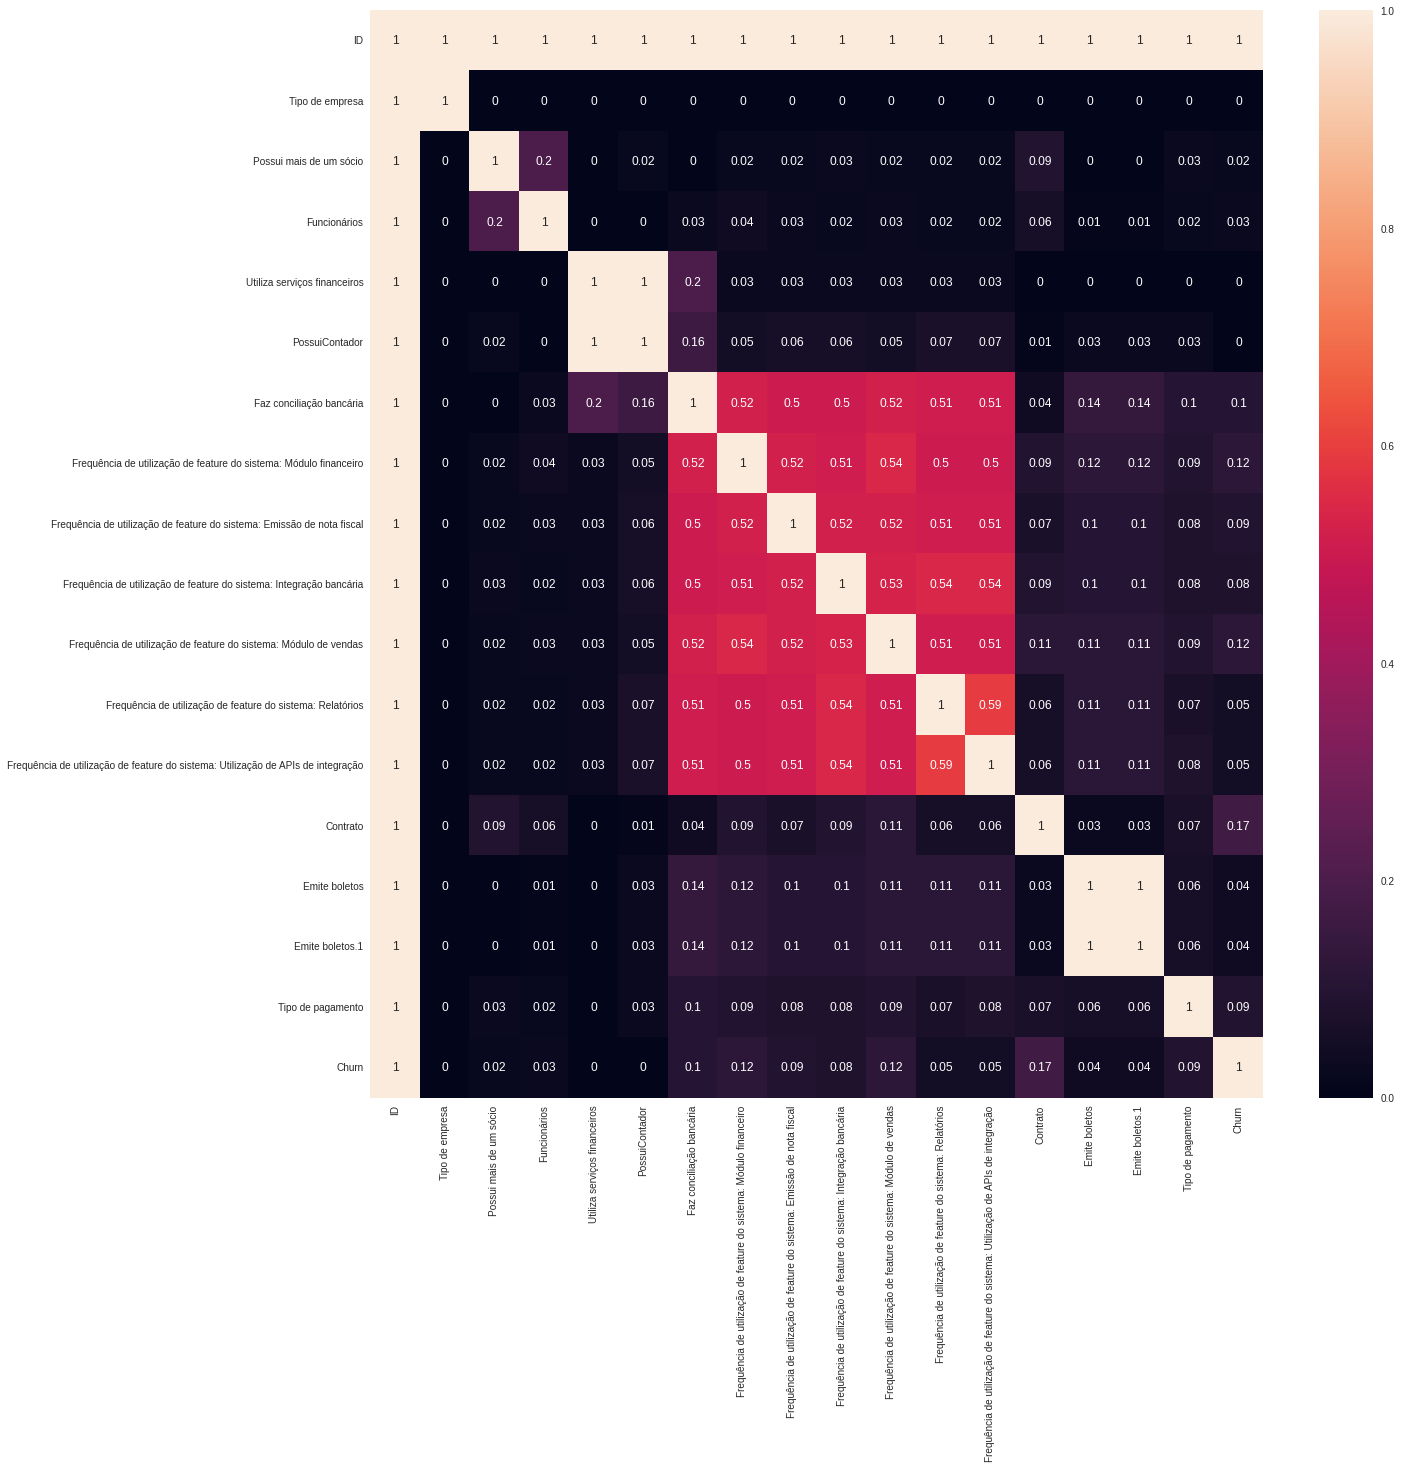

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_cramer_v, annot=True)


* Em relação ao Churn, algumas variáveis categóricas mais se destacaram na matriz V de Cramer (de 0 a 1): 
  * **Contrato**: associação fraca de **0.17**. 
  * Frequência de utilização de Feature do sistema:
    * **Módulo de vendas**: uma associação fraca de **0.12** com a Frequência de utilização de Feature do sistema.
    * **Módulo financeiro**: associação fraca de **0.12** com a Frequência de utilização de Feature do sistema.
    * **Emissão de nota fiscal**: associação fraca de **0.09** com a Frequência de utilização de Feature do sistema.
    * **Integração bancária**: associação fraca de **0.09** com a Frequência de utilização de Feature do sistema.
  * **Tipo de pagamento**: associação fraca de **0.09** com a Frequência de utilização de Feature do sistema.
  * **Faz conciliação bancária**: associação fraca de **0.1** com a Frequência de utilização de Feature do sistema.

* Todas as variáveis de Frequência de utilização de Feature do sistema tiveram uma associação moderada entre elas mesmas, além da variável 'Faz conciliação bancária', entorno de **0.5** até **0.59**. É necessário analisar mais profundamente essas variáveis.

* Três variáveis categóricas praticamente não possuem associação com o **Churn**:
  * **Tipo de empresa**
  * **Utiliza serviços financeiros**
  * **Possui contador**






#### Features categóricas selecionadas

##### Contrato

* 0: Anual
* 1: Mês-a-mês
* 2: Trimestral

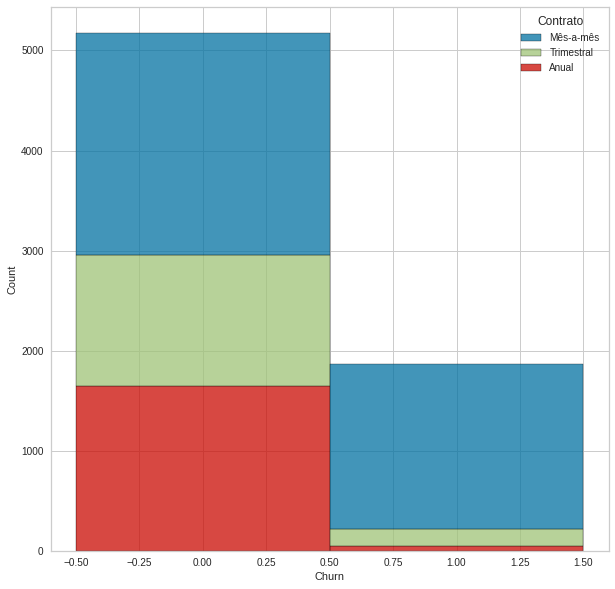

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA, x='Churn', discrete=True, hue='Contrato', multiple='stack')

* Os contratos têm uma grande diferença de proporção para cada grupo.
* O contrato do tipo anual é raro para os clientes que deram churn.

In [ ]:
df_EDA[['Contrato', 'Churn']].groupby('Churn').agg(['value_counts'])

Contrato
                 value_counts
Churn Contrato               
0     Mês-a-mês          2220
      Anual              1647
      Trimestral         1307
1     Mês-a-mês          1655
      Trimestral          166
      Anual                48

In [ ]:
contrato_anual_churn = (48/(1655+166+48))*100
contrato_anual_sem_churn = (1647/(2220+1647+1307))*100
print('contrato_anual_churn: %.3f e contrato_anual_sem_churn: %.3f' % (contrato_anual_churn, contrato_anual_sem_churn))

contrato_anual_churn: 2.568 e contrato_anual_sem_churn: 31.832


* **2.58%** dos clientes que deram churn fecharam contrato anual.
* **31.832** dos clientes que não deram churn fecharam contrato anual.
* Criar uma coluna de **contrato anual** pode ajudar o modelo de machine learning.

###### Contrato X Tipo de pagamento

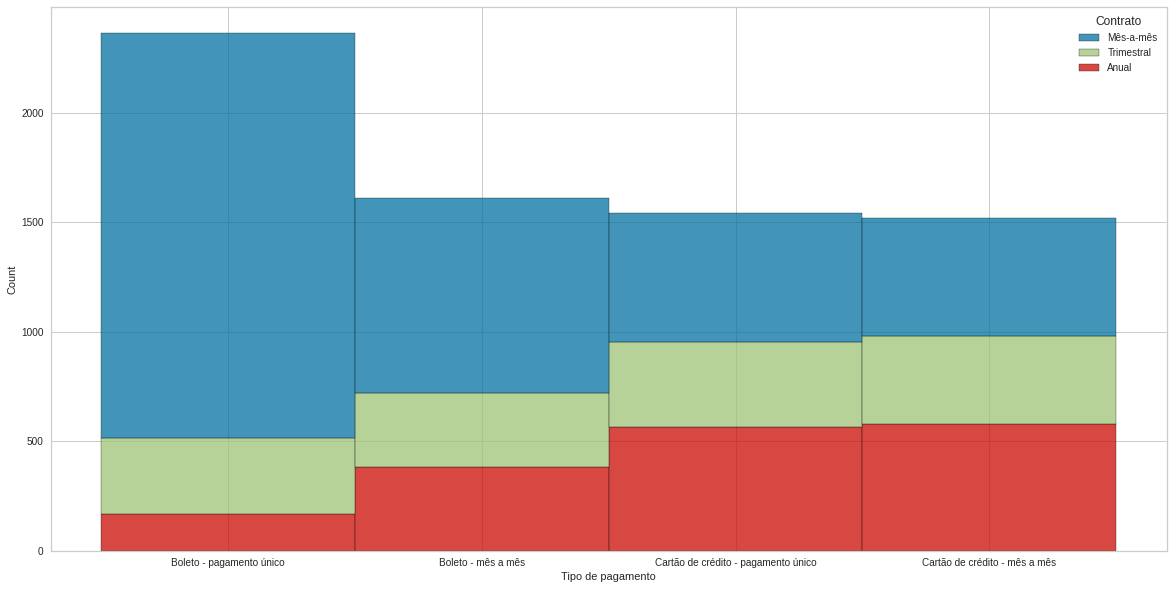

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df_EDA, x='Tipo de pagamento', discrete=True, hue='Contrato', multiple='stack')

* O contrato mês-a-mês é comum no boleto-pagamento único.

##### Frequência de utilização de Feature do sistema

###### Utilização de APIs de Integração

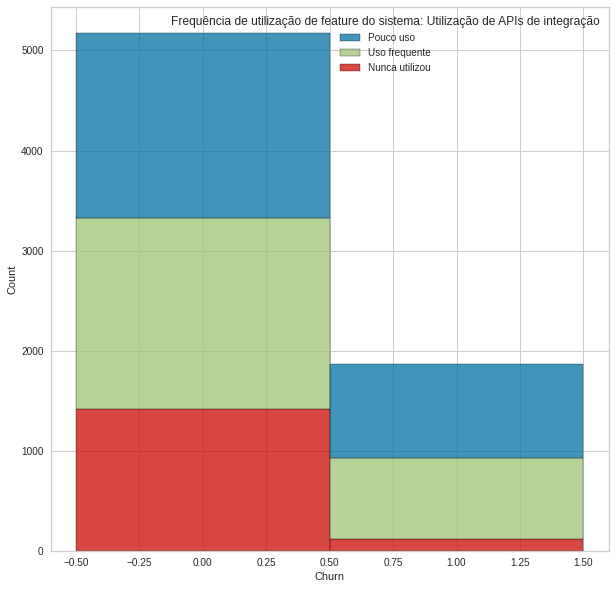

In [ ]:
 frequencia_de_utilizacao = ['Frequência de utilização de feature do sistema: Módulo financeiro', 
                            'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
                            'Frequência de utilização de feature do sistema: Integração bancária',
                            'Frequência de utilização de feature do sistema: Módulo de vendas',
                            'Frequência de utilização de feature do sistema: Relatórios',
                            'Frequência de utilização de feature do sistema: Utilização de APIs de integração',
                            'Churn'
                            ]



plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Utilização de APIs de integração', 
             multiple='stack')

* A proporção é diferente para os clientes que nunca utilizaram a integração de API.


In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Utilização de APIs de integração', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Utilização de APIs de integração
                                                                                                                             value_counts
Churn Frequência de utilização de feature do sistema:...                                                                                 
0     Uso frequente                                                                                    1914                              
      Pouco uso                                                                                        1847                              
      Nunca utilizou                                                                                   1413                              
1     Pouco uso                                                                                         938                              
      Uso frequente                                                                                     818                              
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_API_integracao_churn = 113/(938+818+113)*100
nunca_utilizou_API_integracao_sem_churn = 1413/(1914+1847+1413)*100

print('nunca_utilizou_API_integracao_churn: %.3f e nunca_utilizou_API_integracao_sem_churn: %.3f' % (nunca_utilizou_API_integracao_churn, nunca_utilizou_API_integracao_sem_churn))

nunca_utilizou_API_integracao_churn: 6.046 e nunca_utilizou_API_integracao_sem_churn: 27.310


* **6,04%** dos clientes que deram Churn nunca utilizaram a API de integração.
* **27,31%** dos clientes que não deram churn nunca utilizaram a API de integração.
* Os clientes que deram churn são de longa data?


###### Relatórios

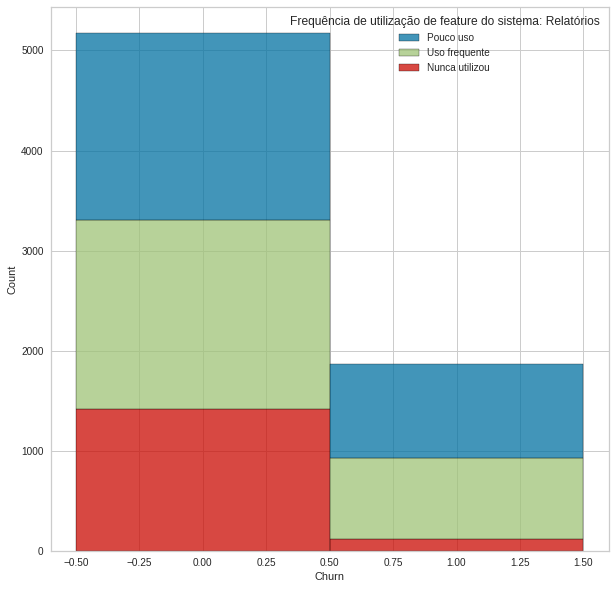

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Relatórios', 
             multiple='stack')

* A proporção é diferente para os clientes que nunca utilizaram os relatórios.

In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Relatórios', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Relatórios
                                                                                                       value_counts
Churn Frequência de utilização de feature do sistema:...                                                           
0     Uso frequente                                                                                    1893        
      Pouco uso                                                                                        1868        
      Nunca utilizou                                                                                   1413        
1     Pouco uso                                                                                         942        
      Uso frequente                                                                                     814        
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_relatorio_churn = (113/(942+814+113))*100
nunca_utilizou_relatorio_sem_churn = (1413/(1893+1868+1413))*100

print('nunca_utilizou_API_integracao_churn: %.3f e nunca_utilizou_API_integracao_sem_churn: %.3f' % (nunca_utilizou_relatorio_churn, nunca_utilizou_relatorio_sem_churn))

nunca_utilizou_API_integracao_churn: 6.046 e nunca_utilizou_API_integracao_sem_churn: 27.310


* **6,04%** dos clientes que deram Churn nunca utilizaram os Relatórios.
* **27,31%** dos clientes que não deram churn nunca utilizaram os Relatórios.
* A proporção de uso daqueles que nunca utilizaram as APIs de integração ou relatórios é bem semelhante. 

###### Módulo de Vendas

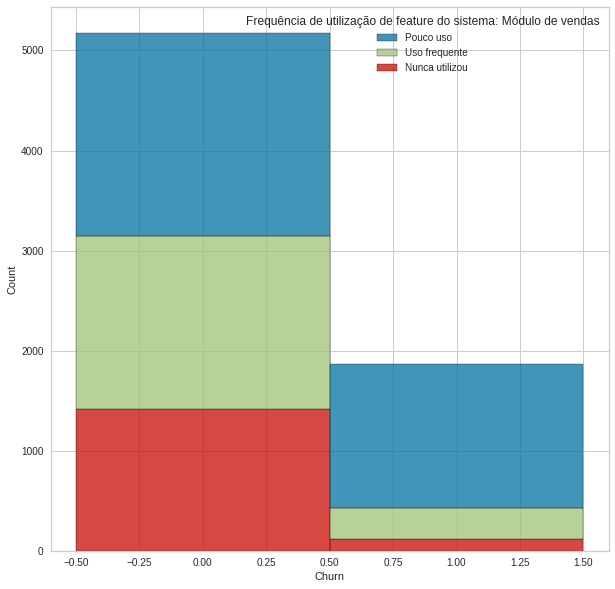

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Módulo de vendas', 
             multiple='stack')

* A proporção de clientes que nunca utilizaram o módulo de vendas é semelhante ao APIs de integração e Relatórios.

In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Módulo de vendas', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Módulo de vendas
                                                                                                             value_counts
Churn Frequência de utilização de feature do sistema:...                                                                 
0     Pouco uso                                                                                        2027              
      Uso frequente                                                                                    1734              
      Nunca utilizou                                                                                   1413              
1     Pouco uso                                                                                        1446              
      Uso frequente                                                                                     310              
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_modulo_venda_churn = (113/(1446+310+113))*100
nunca_utilizou_modulo_venda_sem_churn = (1413/(2027+1734+1413))*100

print('nunca_utilizou_modulo_venda_churn: %.3f e nunca_utilizou_modulo_venda_sem_churn: %.3f' % (nunca_utilizou_modulo_venda_churn, nunca_utilizou_modulo_venda_sem_churn))

nunca_utilizou_modulo_venda_churn: 6.046 e nunca_utilizou_modulo_venda_sem_churn: 27.310


* **6,04%** dos clientes que deram Churn nunca utilizaram o Módulo de vendas.
* **27,31%** dos clientes que não deram churn nunca utilizaram o Módulos de vendas.
* A proporção de uso daqueles que nunca utilizaram as APIs de integração, relatórios e módulo de vendas é bem semelhante. 

###### Integração bancária

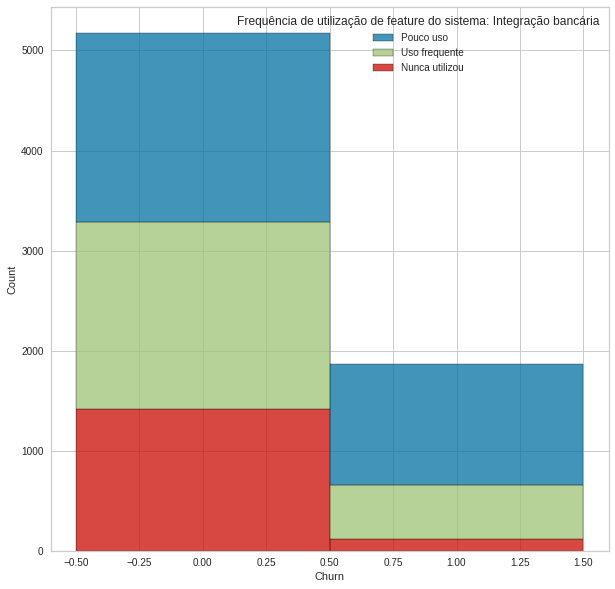

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Integração bancária', 
             multiple='stack')

* A proporção de clientes que nunca utilizaram o módulo de vendas é semelhante ao APIs de integração, Relatórios e módulo de vendas.

In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Integração bancária', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Integração bancária
                                                                                                                value_counts
Churn Frequência de utilização de feature do sistema:...                                                                    
0     Pouco uso                                                                                        1884                 
      Uso frequente                                                                                    1877                 
      Nunca utilizou                                                                                   1413                 
1     Pouco uso                                                                                        1211                 
      Uso frequente                                                                                     545                 
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_integracao_bancaria_churn = (113/(1211+545+113))*100
nunca_utilizou_integracao_bancaria_sem_churn = (1413/(1884+1877+1413))*100

print('nunca_utilizou_integracao_bancaria_churn: %.3f e nunca_utilizou_integracao_bancaria_sem_churn: %.3f' % (nunca_utilizou_integracao_bancaria_churn, nunca_utilizou_integracao_bancaria_sem_churn))

nunca_utilizou_integracao_bancaria_churn: 6.046 e nunca_utilizou_integracao_bancaria_sem_churn: 27.310


* **6,04%** dos clientes que deram Churn nunca utilizaram a integração bancária.
* **27,31%** dos clientes que não deram churn nunca utilizaram a integração bancária.
* A proporção de uso daqueles que nunca utilizaram as APIs de integração, relatórios, módulo de vendas e integração bancária é bem semelhante. 

####### Emissão de nota fiscal

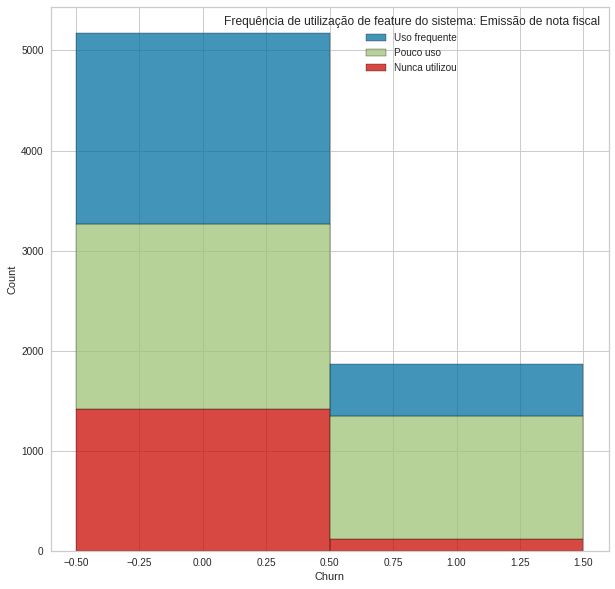

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Emissão de nota fiscal', 
             multiple='stack')

* A proporção de clientes que nunca utilizaram o módulo de vendas é semelhante ao APIs de integração, Relatórios, Módulo de vendas e integração bancária.

In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Emissão de nota fiscal', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Emissão de nota fiscal
                                                                                                                   value_counts
Churn Frequência de utilização de feature do sistema:...                                                                       
0     Uso frequente                                                                                    1906                    
      Pouco uso                                                                                        1855                    
      Nunca utilizou                                                                                   1413                    
1     Pouco uso                                                                                        1233                    
      Uso frequente                                                                                     523                    
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_emissao_nota_fiscal_churn = (113/(1233+523+113))*100
nunca_utilizou_emissao_nota_fiscal_sem_churn = (1413/(1906+1855+1413))*100

print('nunca_utilizou_emissao_nota_fiscal_churn: %.3f e nunca_utilizou_emissao_nota_fiscal_sem_churn: %.3f' % (nunca_utilizou_emissao_nota_fiscal_churn, nunca_utilizou_emissao_nota_fiscal_sem_churn))

nunca_utilizou_emissao_nota_fiscal_churn: 6.046 e nunca_utilizou_emissao_nota_fiscal_sem_churn: 27.310


###### Emissão de nota fiscal por meses de permanência


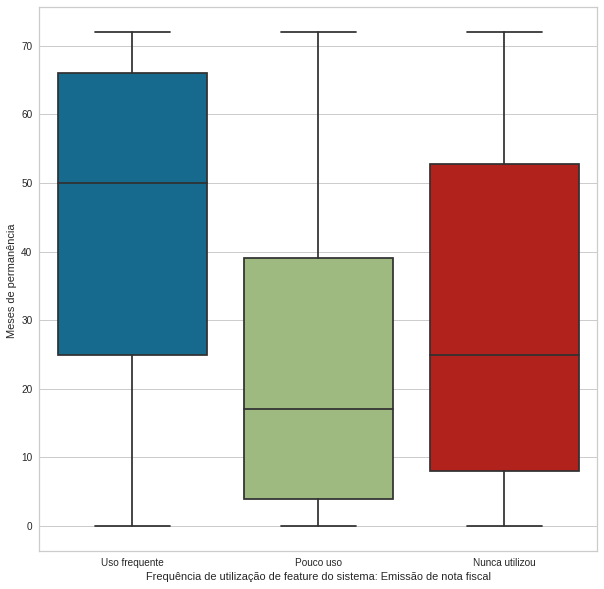

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA,
             x='Frequência de utilização de feature do sistema: Emissão de nota fiscal', 
             y='Meses de permanência ')

* A mediana do uso frequente da emissão de nota fiscal é superior aos outros grupos.

###### Módulo financeiro

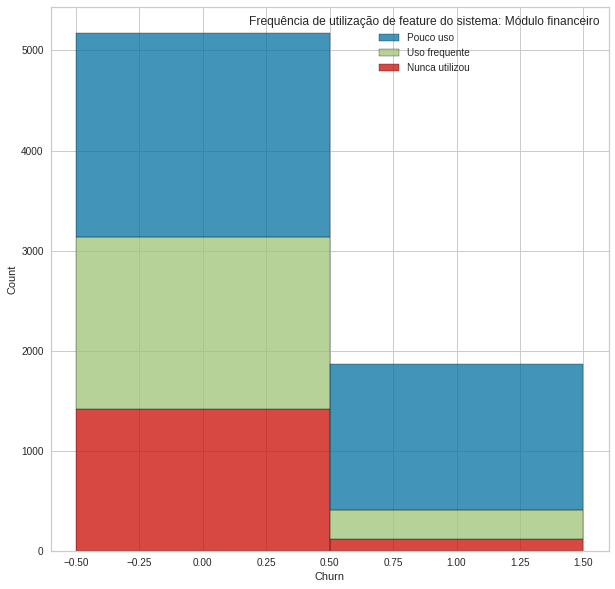

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_EDA[frequencia_de_utilizacao], 
             x='Churn', discrete=True, 
             hue='Frequência de utilização de feature do sistema: Módulo financeiro', 
             multiple='stack')

* A proporção de clientes que nunca utilizaram o módulo de vendas é semelhante ao APIs de integração, Relatórios, Módulo de vendas, integração bancária e módulo financeiro

In [ ]:
df_EDA[['Frequência de utilização de feature do sistema: Módulo de vendas', 'Churn']].groupby('Churn').agg(['value_counts'])

Frequência de utilização de feature do sistema: Módulo de vendas
                                                                                                             value_counts
Churn Frequência de utilização de feature do sistema:...                                                                 
0     Pouco uso                                                                                        2027              
      Uso frequente                                                                                    1734              
      Nunca utilizou                                                                                   1413              
1     Pouco uso                                                                                        1446              
      Uso frequente                                                                                     310              
      Nunca utilizou                                                                                    113

In [ ]:
nunca_utilizou_modulo_venda_churn = (113/(1446+310+113))*100
nunca_utilizou_modulo_venda_sem_churn = (1413/(2027+1734+1413))*100

print('nunca_utilizou_emissao_nota_fiscal_churn: %.3f e nunca_utilizou_emissao_nota_fiscal_sem_churn: %.3f' % (nunca_utilizou_modulo_venda_churn, nunca_utilizou_modulo_venda_sem_churn))

nunca_utilizou_emissao_nota_fiscal_churn: 6.046 e nunca_utilizou_emissao_nota_fiscal_sem_churn: 27.310


* **6,04%** dos clientes que deram Churn nunca utilizaram o módulo de vendas.
* **27,31%** dos clientes que não deram churn nunca utilizaram o módulo de vendas.
* A proporção de uso daqueles que nunca utilizaram as APIs de integração, relatórios, módulo de vendas e integração bancária é bem semelhante. 

### Análise das variáveis numéricas

##### Receita mensal

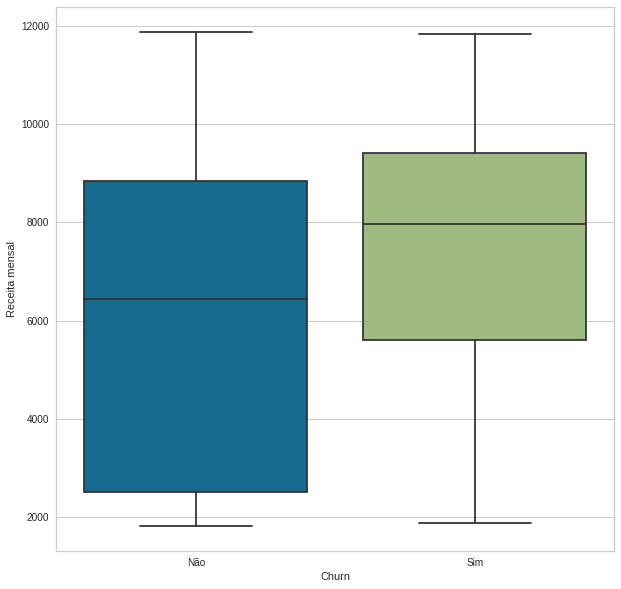

In [ ]:
df_EDA_numericas['Receita mensal'] = df_EDA['Receita mensal'].replace('[R$,]', '', regex=True).astype(float)

df_EDA_numericas['Receita total'] = df_EDA['Receita total'].replace('[R$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA_numericas, x='Churn', y='Receita mensal')

* O boxplot mostra uma receita mais alta na mediana para aqueles que tiveram churn em relação àqueles que não tiveram.
* Essa diferença tem significância estatística?

Teste T estatístico para ver se a média de receita mensal é diferente entre os grupos

In [ ]:
from scipy.stats import ttest_ind
# Teste T estatístico
stat, p = ttest_ind(df_EDA_numericas[df_EDA_numericas['Churn']=='Não']['Receita mensal'], 
                    df_EDA_numericas[df_EDA_numericas['Churn']=='Sim']['Receita mensal'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-16.537, p=0.000


* Sendo o nível de significância de 5% e o valor-p < 0.05, a diferença da média de receita mensal tem significância estatística entre os grupos.

###### Receita mensal por tipo de contrato

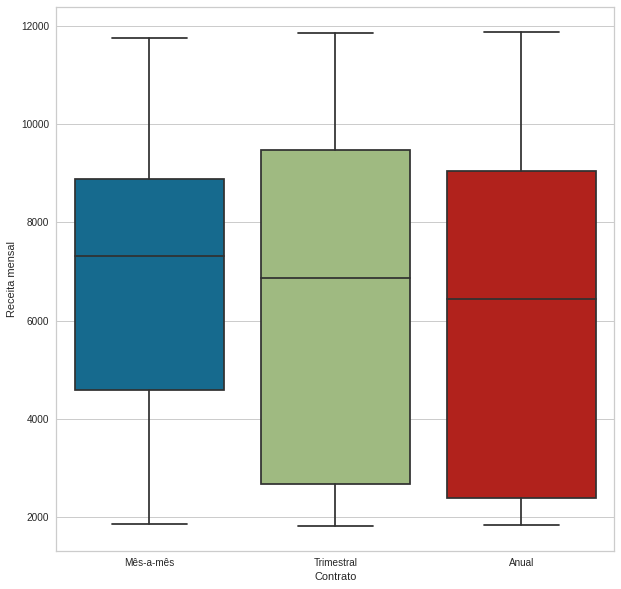

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA, x='Contrato', y='Receita mensal')

* A receita mensal pelo tipo de contrato, na mediana, está semelhante para os três grupos.

#### Receita total

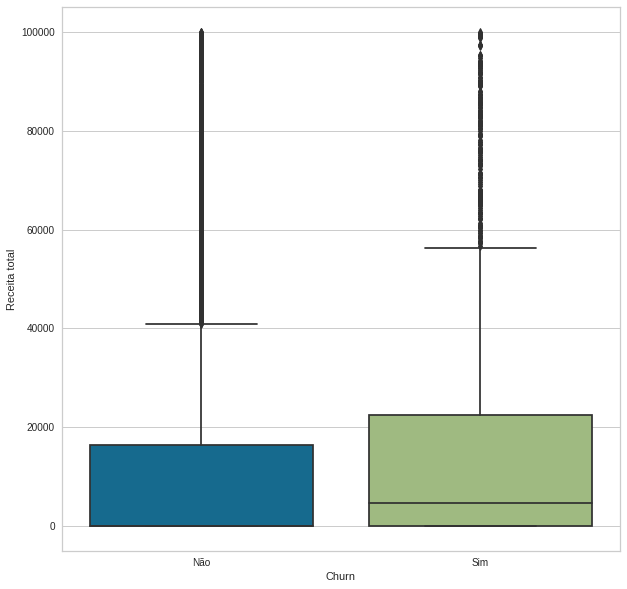

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA_numericas, x='Churn', y='Receita total')

* O boxplot mostra uma receita total mais alta na mediana para aqueles que tiveram churn em relação àqueles que não tiveram.
* Há muitos outliers nesse boxplot.
* Será que a diferença é estatisticamente significativa?


In [ ]:
from scipy.stats import ttest_ind

# Teste T estatístico
stat, p = ttest_ind(df_EDA_numericas[df_EDA_numericas['Churn']=='Não']['Receita total'].dropna(axis=0), 
                    df_EDA_numericas[df_EDA_numericas['Churn']=='Sim']['Receita total'].dropna(axis=0))
print('stat=%.10f, p=%.10f' % (stat, p))

stat=-3.5430342514, p=0.0003981180


Sendo o nível de significância de 5% e o valor-p < 0.05, a diferença da média de receita total tem significância estatística entre os grupos.

In [ ]:
df_EDA_numericas[['Churn', 'Receita total']].groupby('Churn').agg(['mean', 'median'])

Receita total           
               mean     median
Churn                         
Não    14100.920073     5.6237
Sim    16557.896461  4585.0000

##### Receita total por tipo de contrato

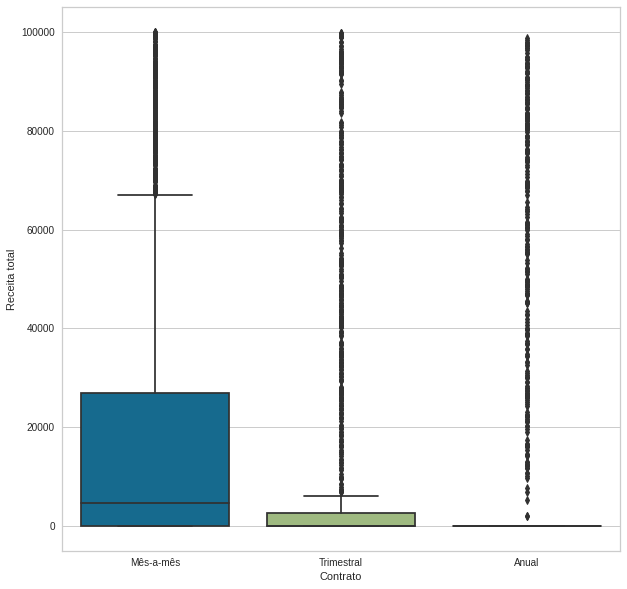

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA, x='Contrato', y='Receita total')

* Os clientes que fecharam contrato mês-a-mês apresentam uma receita total, na mediana, superior aos que fecharam contratos trimestrais ou anuais.


#### Meses de permanência

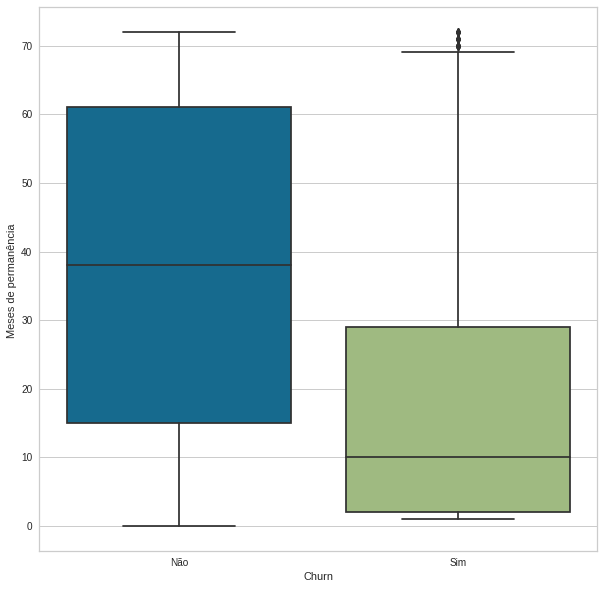

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA_numericas, x='Churn', y='Meses de permanência ')

* A mediana aproximada de meses de permanência corresponde à **10 meses** para aqueles que deram churn.
* A mediana aproximada de meses de permanência corresponde à **38 meses** para aqueles que não deram churn.

In [ ]:
# Teste T estatístico
stat, p = ttest_ind(df_EDA_numericas[df_EDA_numericas['Churn']=='Não']['Meses de permanência '].dropna(axis=0), 
                    df_EDA_numericas[df_EDA_numericas['Churn']=='Sim']['Meses de permanência '].dropna(axis=0))
print('stat=%.10f, p=%.10f' % (stat, p))

stat=31.5795505114, p=0.0000000000


* Sendo o nível de significância de 5% e o valor-p < 0.05, a diferença da média de meses de permanência tem significância estatística entre os grupos.

In [ ]:
df_EDA_numericas[['Churn', 'Meses de permanência ']].describe()

,Meses de permanência
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


###### Meses de permanência por contrato

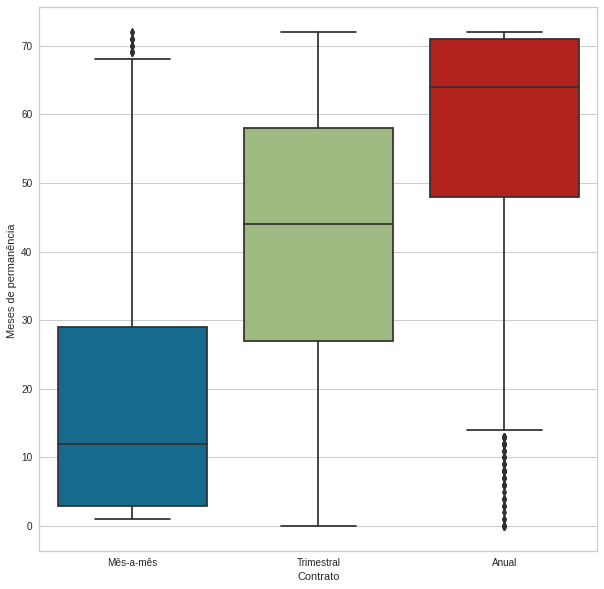

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_EDA, x='Contrato', y='Meses de permanência ')

* A mediana dos meses de permanência aumentam de acordo com o tipo de contrato.

# Como a EDA me ajudou na escolha das variáveis para o modelo?


* A EDA me ajudou a reduzir drasticamente o número de features no modelo, de 20 para apenas 10.

* Passo a passo:
  * A matriz de correlação V de Cramer me ajudou a selecionar 7 features categóricas, porque 3 features categóricas tiveram pontuação 0 de associação e as outras ficaram abaixo de 0.05, o que foi uma associação bem fraca.
  * Fiz o teste-t nas 3 variáveis numéricas e deu uma diferença estatística significativa entre os grupos que deram Churn e aqueles que não deram. Por isso adicionei todas elas no modelo.
  * No final, ficaram 10 features relevantes no modelo.



# Modelo de Machine Learning

## Pré-Procesamento

In [ ]:
features = ['Contrato',
            'Frequência de utilização de feature do sistema: Módulo financeiro', 
            'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
            'Frequência de utilização de feature do sistema: Integração bancária',
            'Frequência de utilização de feature do sistema: Módulo de vendas',
            'Tipo de pagamento',
            'Faz conciliação bancária',
            'Receita mensal', 
            'Receita total',
            'Meses de permanência '
            ]

X_preprocessed = df[features].copy()
y_preprocessed = df['Churn'].copy().ravel()

###Dividir dataset em treino e validação.

In [ ]:
# Dividir em 70% de treino, 30% de validação
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y_preprocessed, random_state=0, train_size=0.7)


In [ ]:
variaveis_numericas = ['Receita mensal', 'Receita total',  'Meses de permanência ']
variaveis_categoricas = X_preprocessed.drop(variaveis_numericas, axis=1).columns.to_list()

In [ ]:
X_train, X_val, y_train, y_val = preprocessing(X_train, 
                                                X_val,
                                                y_train, 
                                                y_val,
                                                variaveis_numericas,
                                                variaveis_categoricas
                                                )

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4930, 10), (2113, 10), (4930,), (2113,))

###Dataset para validação cruzada

In [ ]:
X_cross_validation = pd.concat([X_train, X_val], axis=0)

y_cross_validation = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

## Baseline

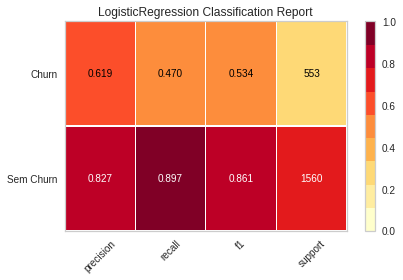

In [ ]:
logistic_regression_baseline = LogisticRegression(random_state=0)
logistic_regression_baseline.fit(X_train, y_train)
previsao_prob_baseline = logistic_regression_baseline.predict_proba(X_val)

relatorio_baseline = classification_report(
    LogisticRegression(), X_train, y_train, X_val, y_val, classes=['Sem Churn', 'Churn'], support=True
)

* Precision: 61,9%. 
  * 61,9% dos clientes, que foram detectados como Churn, eram clientes que deram Churn de fato.
* Recall: 47%.
  * 47% dos clientes, que deram de fato Churn, foram detectados como Churn.

##### Análise de distribuição de probabilidades de Churn.

In [ ]:
resultado_baseline = output_test(previsao_prob_baseline)

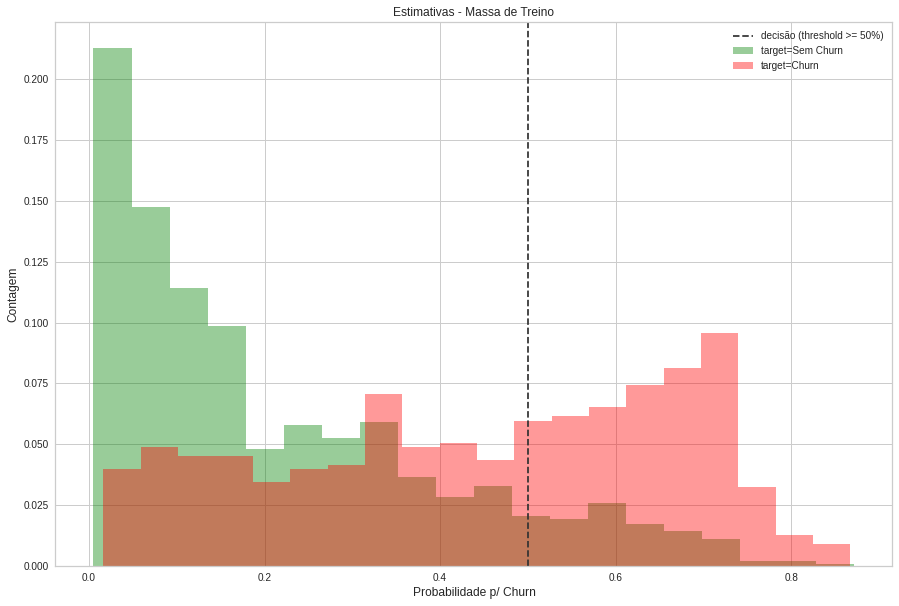

In [ ]:
output_histograma(resultado_baseline)

* O gráfico mostra a distribuição de probabilidades de Churn que o modelo previu de acordo com o dataset X_val.
* Nas probabilidades p/ churn abaixo de 0.5, mostra que o modelo não detectou bem os falsos negativos.

#### Far e Frr

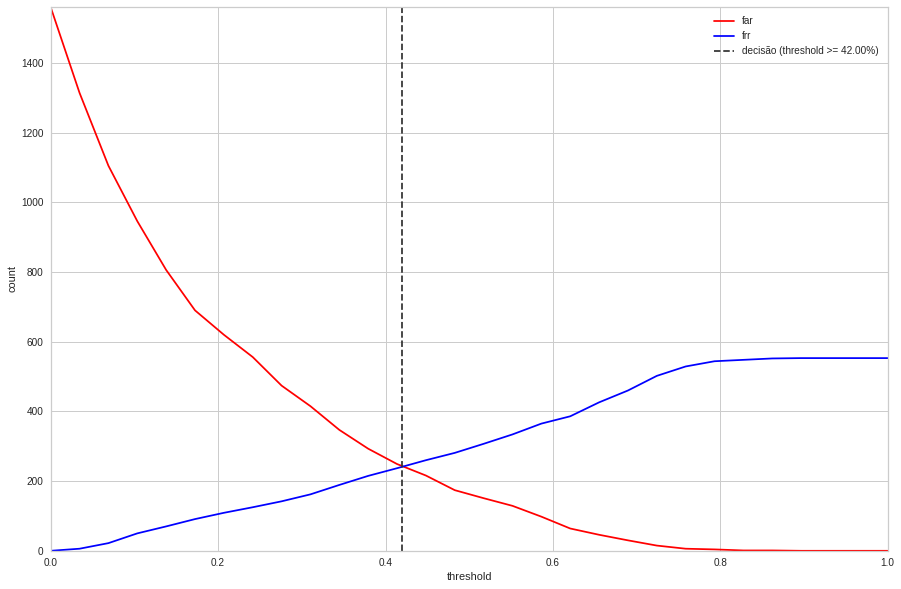

In [ ]:
far_frr_grafico(resultado_baseline, threshold=0.42)

* O gráfico mostra o far (False Acceptance Rate): a proporção de dados negativos (sem Churn) que seriam considerados positivos (Churn) para dado threshold de decisão.
* E o frr (False Rejection Rate): a proporção de dados positivos (com Churn) que seriam considerados negativos (sem Churn) para dado threshold de decisão.

* No threshold 0.42, o frr é igual ao far, o que significa que existe uma proporção de erro igual de falsos positivos e falsos negativos. 

#### Análise de ROC e AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


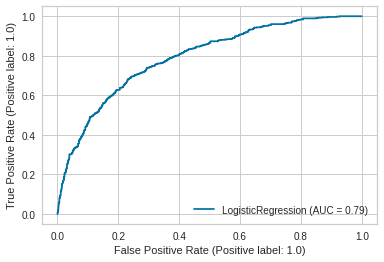

In [ ]:
plot_roc_curve(logistic_regression_baseline, X_val, y_val) 

* Plot da curva ROC para medir a proporção de verdadeiros positivos e a proporção de falsos negativos em relação à validação.
* A área abaixo da curva ROC é 0.79.

## Random Forest

#### Modelo Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier(random_state=0, 
                             n_estimators=100, 
                             max_depth=5, 
                             class_weight={0: 1, 1: 2}, 
                             min_samples_split=3)


##### Cross Validation 


In [ ]:
previsao_prob = cross_val_predict(RFC, 
                                  X_cross_validation, 
                                  y_cross_validation, 
                                  cv=3, 
                                  method='predict_proba')


##### Matriz de confusão

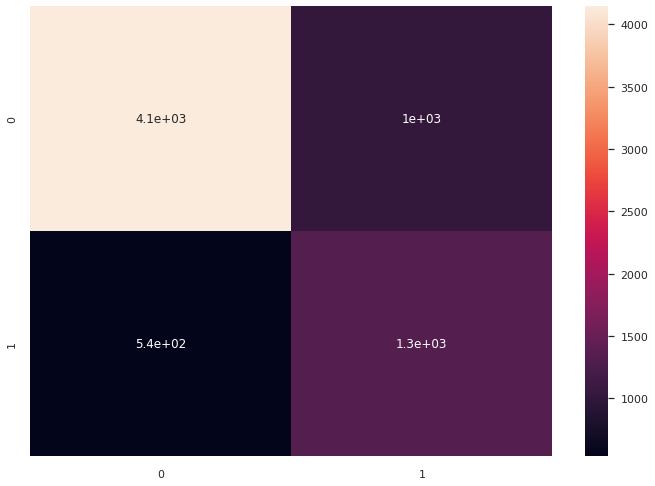

In [ ]:
#RFC.fit(X_train, y_train)
#previsao_prob = RFC.predict_proba(X_val)
threshold = 0.5
previsao = (previsao_prob[:, 1]>=threshold).astype(float)

resultados = {
            'Accuracy': [accuracy_score(y_cross_validation, previsao).round(3)],
            'Precision': [precision_score(y_cross_validation, previsao).round(3)],
            'Recall': [recall_score(y_cross_validation, previsao).round(3)],
            'F1-Score': [f1_score(y_cross_validation, previsao).round(3)]}

# Matriz de confusão
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(confusion_matrix(y_cross_validation, previsao), annot=True)


In [ ]:
pd.DataFrame(resultados)

,Accuracy,Precision,Recall,F1-Score
0,0.778,0.564,0.713,0.63


* Precision: 56,4%.
  * 56,4% dos clientes, que foram detectados como Churn, eram clientes que deram Churn de fato.
* Recall: 71,3%
  * 71,3% dos clientes, que deram de fato Churn, foram detectados como Churn.
* F1-Score: 63%.

##### Análise de distribuição de probabilidades de Churn.

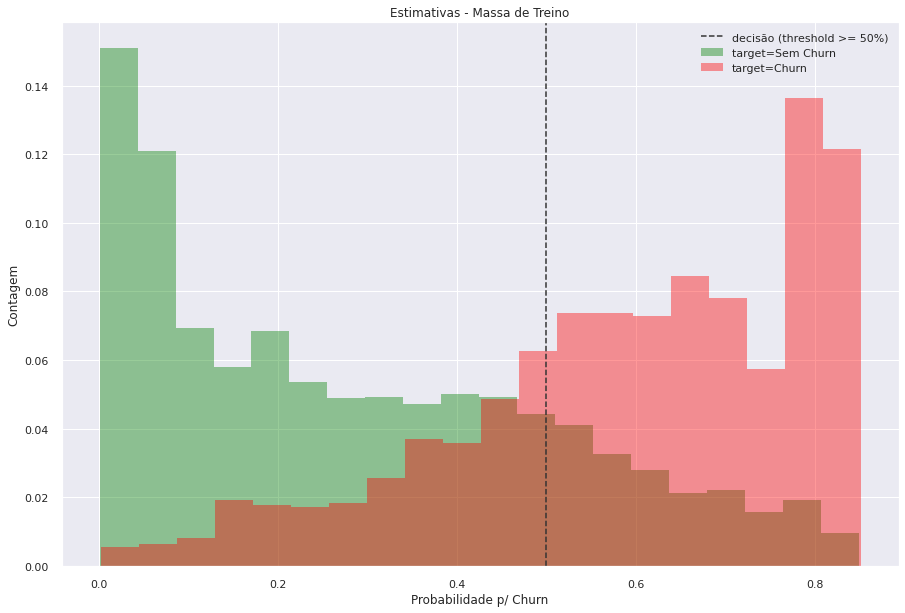

In [ ]:
resultado = output_test_full(previsao_prob, y_cross_validation)
output_histograma(resultado)

* O gráfico mostra a distribuição de probabilidades de Churn que o modelo previu de acordo com o dataset X_val.
* Nas probabilidades p/ churn abaixo de 0.5, mostra que o modelo detectou bem os falsos negativos, porque a massa de falsos negativos está diminuindo conforme chega a 0.

##### Far e Frr

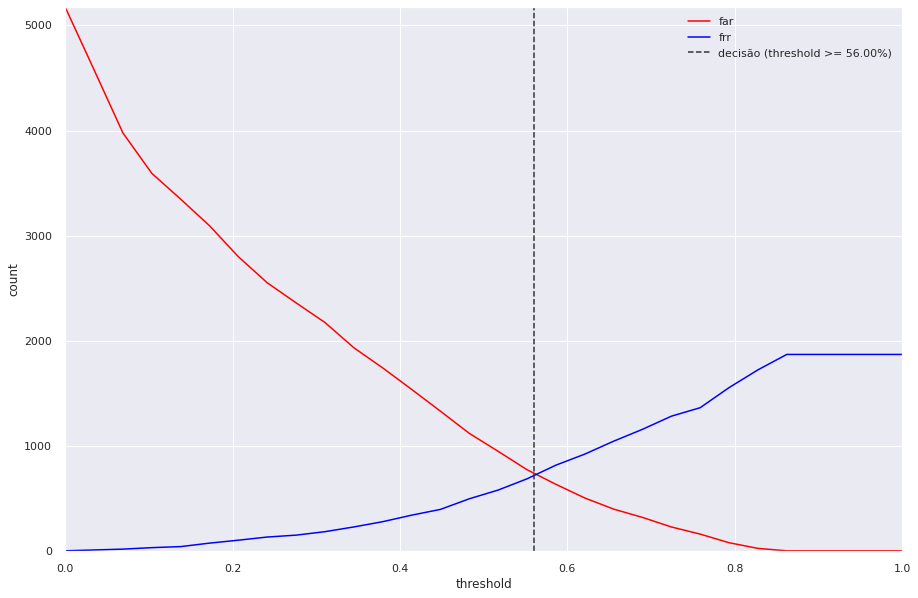

In [ ]:
far_frr_grafico(resultado, threshold=0.56)

* O gráfico mostra o far (False Acceptance Rate): a proporção de dados negativos (sem Churn) que seriam considerados positivos (Churn) para dado threshold de decisão.
* E o frr (False Rejection Rate): a proporção de dados positivos (com Churn) que seriam considerados negativos (sem Churn) para dado threshold de decisão.

* No threshold 0.56, o frr é igual ao far, o que significa que existe uma proporção de erro igual de falsos positivos e falsos negativos. 

##### Análise de ROC e AUC

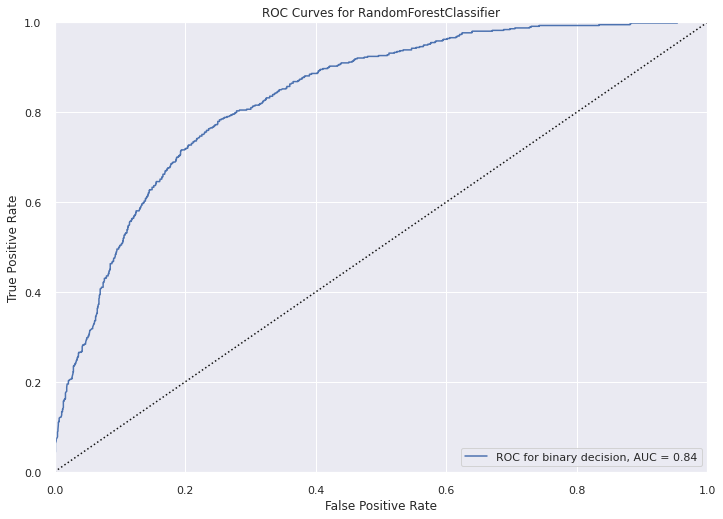

In [ ]:
plot_roc_auc = ROCAUC(RFC, classes=['Sem Churn', 'Churn'], binary=True)
plot_roc_auc.fit(X_train, y_train)
plot_roc_auc.score(X_val, y_val)
plot_roc_auc.show()

* Plot da curva ROC para medir a proporção de verdadeiros positivos e a proporção de falsos negativos em relação à validação.
* A área abaixo da curva ROC é 0.84, o que foi superior à baseline.

##### Importância das features.

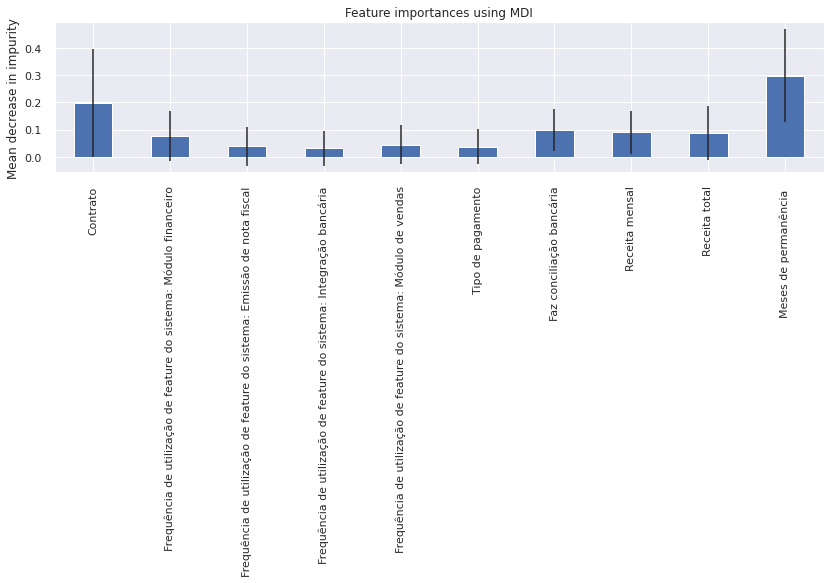

In [ ]:
feature_names = [f"{i}" for i in X_cross_validation.columns]
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* As 5 features mais importantes do modelo foram:
  * Meses de permanência
  * Contrato
  * Faz conciliação bancária
  * Receita mensal
  * Receita total

  


# Escolha das métricas
**Quanto custa o erro?**

* Justificativas para a minha escolha de três métricas:
  * Recall: 
    * Os falsos negativos, aqueles que o modelo não detectou como churn e deram de fato churn apresentaram o custo de perder o valor do contrato por cliente cerca de R$289 reais/mês (esse número é apenas um benchmark de preço a partir dos planos mensais do site). 
  * Precision:
    * Os falsos positivos, aqueles que o modelo detectou como churn e não deram churn são úteis para saber o custo de estratégias mais agressivas como um alto desconto no plano.
  * F1-Score:
    * É a média harmônica entre precision e recall, uma métrica para saber se o modelo equilibra as duas métricas para diversas tratativas da área de negócios.

# Interpretação dos outputs

**Sobre o modelo:**
* **Precision**: 56,4%.
  * 56,4% dos clientes, que foram detectados como Churn, eram clientes que deram Churn de fato.
* **Recall**: 71,3%.
  * 71,3% dos clientes, que deram de fato Churn, foram detectados como Churn.
* **F1-Score**: 63%.

**Alguns insights:**
* As features mais importantes do modelo foram:
  * Meses de permanência, Contrato, Receita mensal e Receita total.
* Receita mensal, Receita total e meses de permanência tiveram médias diferentes entre os grupos de churn e não churn com significância estatística (considerei o nível de significância de 5%).
* Tipo de empresa, Utiliza serviços financeiros e Possui contador foram variáveis consideradas sem associação ao Churn de acordo com a matriz de correlação V de Cramer.



# Efeito

## Tabela com a probabilidade do churn.

In [ ]:
tabela_churn = pd.concat([X_cross_validation, pd.Series(previsao_prob[:, 1])], axis=1)
tabela_churn = tabela_churn.rename(columns={0:'Probabilidade_de_churn'})
tabela_churn = tabela_churn[['Probabilidade_de_churn']]

In [ ]:
tabela_churn

,Probabilidade_de_churn
0,0.480685
1,0.725408
2,0.054428
3,0.034878
4,0.179218
...,...
7038,0.592090
7039,0.357707
7040,0.210696
7041,0.024714


## Experimento 1

Para este estudo, considere que é possível controlar quais as tratativas serão utilizadas, quando e para quais clientes elas serão direcionadas.

### Pressupostos do documento.

* O valor do contrato utilizado foi de **R$289/mês**.

* O custo-benefício está sendo avaliado a partir dos falsos positivos e verdadeiros positivos:
  * A variável custo_benefício foi calculada da seguinte forma: valor do contrato com desconto X Verdadeiros positivos - valor do contrato com desconto X Falsos positivos

* A taxa de retenção dos verdadeiros positivos é de 100%.

* O desconto foi de 50%.

* As features do modelo são: 
  * Contrato
  * Frequência de utilização de feature do sistema: Módulo financeiro 
  * Frequência de utilização de feature do sistema: Emissão de nota fiscal
  * Frequência de utilização de feature do sistema: Integração bancária
  * Frequência de utilização de feature do sistema: Módulo de vendas
  * Tipo de pagamento
  * Faz conciliação bancária
  * Receita mensal 
  * Receita total
  * Meses de permanência

* Para o modelo ser válido, a quantidade de verdadeiros positivos não pode ser 0.

### Hipótese: o modelo com melhor custo benefício para dar desconto ao cliente não tem o maior threshold.

###Design do experimento.

* Tipo de experimento: comparar o impacto dos diferentes Thresholds do Random Forest Classifier ao dar desconto de 50%.
* Configurar os seguintes parâmetros do Random Forest Classifier:
  * Parâmetros: 
    * random_state=0
    * n_estimators=100 
    * max_depth=5
    * class_weight={0: 1, 1: 2}
    * min_samples_split=3)
* Pré-processamento
* Construir dataset para cross validation
* Cross validation
  * cv=10
* Função para rodar múltiplos thresholds e armazenar em uma tabela. 


### Desenvolver experimento

#### Importar dataset

In [ ]:
link = '/gdrive/MyDrive/Colab Notebooks/customer_churn_data - customer_churn_data.csv'
df = pd.read_csv(link, sep=',', encoding='utf-8')
X = df.drop('Churn', axis=1)
y = df['Churn']

#### Random Forest Classifier

In [ ]:
# Parâmetros do Random Forest Classifier
experimento_1_RFC = RandomForestClassifier(random_state=0, 
                             n_estimators=100, 
                             max_depth=5, 
                             class_weight={0: 1, 1: 2}, 
                             min_samples_split=3)

#### Features selecionadas para o modelo

In [ ]:
features = ['Contrato',
            'Frequência de utilização de feature do sistema: Módulo financeiro', 
            'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
            'Frequência de utilização de feature do sistema: Integração bancária',
            'Frequência de utilização de feature do sistema: Módulo de vendas',
            'Tipo de pagamento',
            'Faz conciliação bancária',
            'Receita mensal', 
            'Receita total',
            'Meses de permanência '
            ]

# Separar em variáveis numéricas e categóricas para a função de pré-processamento.
variavel_numerica = ['Receita mensal', 'Receita total', 'Meses de permanência ']
variavel_categorica = ['Contrato',
                      'Frequência de utilização de feature do sistema: Módulo financeiro', 
                      'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
                      'Frequência de utilização de feature do sistema: Integração bancária',
                      'Frequência de utilização de feature do sistema: Módulo de vendas',
                      'Tipo de pagamento',
                      'Faz conciliação bancária'
                      ]

####Separar em treino e validação

In [ ]:
# Separar e validar para usar aplicar a função de pré-processamento.
X_train, X_val, y_train, y_val = train_test_split(X[features], y, train_size=0.7)

#### Pré-processamento

In [ ]:
X_train, X_val, y_train, y_val = preprocessing(X_train, 
                                               X_val, 
                                               y_train, 
                                               y_val, 
                                               variavel_numerica, 
                                               variavel_categorica)

#### Preparar dataset para cross_validation

In [ ]:
X_preprocessed_exp_1 = pd.concat([X_train, X_val], axis=0)

y_preprocessed_exp_1 = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

#### Cross validation

In [ ]:
experimento_1_previsão = cross_val_predict(experimento_1_RFC, 
                          X_preprocessed_exp_1, 
                          y_preprocessed_exp_1, 
                          cv=10, 
                          method='predict_proba')

#### Threshold e cálculo de custo do desconto

In [ ]:
def experimento_1(experimento_1_previsão, valor_contrato=144.5, plano_mensal=289):
  resultado = pd.DataFrame()
  valor_contrato = valor_contrato
  plano_mensal = plano_mensal
  for threshold in np.arange(0, 1, 0.1):
    experimento_1_previsão_prob = (experimento_1_previsão[:, 1]>=threshold).astype(int)
    custo_benefício = (valor_contrato*confusion_matrix(y_preprocessed_exp_1, experimento_1_previsão_prob)[1][1])-(valor_contrato*confusion_matrix(y_preprocessed_exp_1, experimento_1_previsão_prob)[0][1])
    resultado = resultado.append({'Threshold': threshold,
                                  'Precision': precision_score(y_preprocessed_exp_1, experimento_1_previsão_prob).round(2),
                                  'Recall': recall_score(y_preprocessed_exp_1, experimento_1_previsão_prob).round(2),
                                  'F1-Score': f1_score(y_preprocessed_exp_1, experimento_1_previsão_prob).round(2),
                                  'Falsos Positivos': confusion_matrix(y_preprocessed_exp_1, experimento_1_previsão_prob)[0][1],
                                  'Verdadeiros Positivos': confusion_matrix(y_preprocessed_exp_1, experimento_1_previsão_prob)[1][1], 
                                  'Plano com desconto de ' + str((1-valor_contrato/plano_mensal)*100) + '%': valor_contrato,
                                  'Custo-benefício':custo_benefício}, ignore_index=True)
  else:
    return resultado
    

### Rodar o Experimento

In [ ]:
resultado = experimento_1(experimento_1_previsão, valor_contrato=144.5, plano_mensal=289)
resultado.sort_values(by='Custo-benefício', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Precision,Recall,F1-Score,Falsos Positivos,Verdadeiros Positivos,Plano com desconto de 50.0%,Custo-benefício
6,0.6,0.64,0.53,0.58,561.0,990.0,144.5,61990.5
7,0.7,0.70,0.36,0.48,298.0,680.0,144.5,55199.0
5,0.5,0.56,0.71,0.63,1040.0,1336.0,144.5,42772.0
8,0.8,0.80,0.14,0.24,66.0,270.0,144.5,29478.0
9,0.9,0.00,0.00,0.00,0.0,0.0,144.5,0.0
4,0.4,0.49,0.84,0.62,1628.0,1561.0,144.5,-9681.5
3,0.3,0.43,0.91,0.59,2211.0,1694.0,144.5,-74706.5
2,0.2,0.38,0.95,0.54,2870.0,1771.0,144.5,-158805.5
1,0.1,0.34,0.99,0.50,3645.0,1844.0,144.5,-260244.5
0,0.0,0.27,1.00,0.42,5174.0,1869.0,144.5,-477572.5


### Sintetizar e compartilhar

* Threshold de 0.6: O modelo com o maior custo-benefício, Precisão de 0.64 e Sensibilidade de 0.53. Um ganho financeiro de **R$61.990,5 por mês**.

* Threshold de 0.8: O modelo com o maior threshold e a melhor Precisão, que foi 0.83, porém não teve o melhor custo-benefício. Um ganho financeiro de **R$29.044,5 por mês**.

* Threshold de 0.9: o modelo não classificou cliente algum, assim não será considerado como maior threshold.

* Threshold de 0.5: o modelo com o threshold padrão teve um ganho financeiro de **R$41.471,5**.

* **Hipótese não rejeitada**: o modelo com melhor custo benefício para dar desconto ao cliente não tem o maior threshold.

## Experimento 2

Para este estudo, considere que teremos três tipos de tratativas para o churn e a decisão de quando e para quais clientes utilizar cada uma é da área de negócio.

### Pressupostos do documento.

* As features do K-means são: 
  * Contrato
  * Receita mensal 
  * Receita total
  * Meses de permanência
* Estimador de Kaplan Meier:
  * A probabilidade de sobrevivência é igual a todos os clientes, independentemente de quando são registrados no banco de dados. 

### Hipótese: existe um perfil de cliente com uma taxa de retenção mínima abaixo de 50% nos primeiros 12 meses.

###Design do experimento.

* Tipo de experimento: agrupar perfil do cliente a partir do K-Means. Selecionar o perfil com a menor curva de sobrevivência.
* Configurar os seguintes parâmetros do K-Means:
  * Parâmetros: 
    * random_state=0
    * n_clusters=6
* Pré-processamento
* Preparar dataset para clusterização
* Preparar dataset para curva de sobrevivência
* Separar os clientes em 6 clusters.
* Treinar e plotar Kaplan Meier.
* Descrever perfil do Cluster com a menor curva de sobrevivência.


### Desenvolver experimento

#### Instalar biblioteca lifelines

In [ ]:
!pip install lifelines

     |████████████████████████████████| 349 kB 11.6 MB/s 
     |████████████████████████████████| 81 kB 7.0 MB/s 
     |████████████████████████████████| 38.1 MB 200 kB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=13066abee58186684186bda544ddb255fd6d9cddd40649eb7a61213cbbb1cae6
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#### Importar biblioteca lifelines

In [ ]:
from lifelines import KaplanMeierFitter

#### Importar dataset

In [ ]:
link = '/gdrive/MyDrive/Colab Notebooks/customer_churn_data - customer_churn_data.csv'
df = pd.read_csv(link, sep=',', encoding='utf-8')
X = df.drop('Churn', axis=1)
y = df['Churn']

#### Features selecionadas para o modelo

In [ ]:
features = ['Contrato',
            'Receita mensal', 
            'Receita total',
            'Meses de permanência '
            ]

# Separar em variáveis numéricas e categóricas para a função de pré-processamento.
variavel_numerica = ['Receita mensal', 'Receita total', 'Meses de permanência ']
variavel_categorica = ['Contrato']


####Separar o dataset para o pré-processamento

In [ ]:
# Separar e validar para usar aplicar a função de pré-processamento.
X_train, X_val, y_train, y_val = train_test_split(X[features], y, train_size=0.7, random_state=0)

#### Pré-processamento

In [ ]:
X_train, X_val, y_train, y_val = preprocessing(X_train, 
                                               X_val, 
                                               y_train, 
                                               y_val, 
                                               variavel_numerica, 
                                               variavel_categorica)

#### Preparar dataset para clusterização

In [ ]:
X_preprocessed_exp_2 = pd.concat([X_train, X_val], axis=0)

y_preprocessed_exp_2 = pd.concat([pd.Series(y_train), pd.Series(y_val)], axis=0)

#### Clusterização com K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
X_preprocessed_exp_2['Cluster'] = kmeans.fit_predict(X_preprocessed_exp_2)

#### Preparar dataset para curva de sobrevivência.

In [ ]:
df_preprocessed_exp_2 =X_preprocessed_exp_2.merge(y_preprocessed_exp_2.rename('Churn'), left_index=True, right_index=True)

#### Estimador de Kaplan Meier

In [ ]:
# Parâmetros do Random Forest Classifier
experimento_2_kaplan_meier = KaplanMeierFitter()

#### Separar os clientes em 6 grupos.

In [ ]:
grupos = df_preprocessed_exp_2['Cluster']
i1 = (grupos==0)
i2 = (grupos==1)
i3 = (grupos==2)
i4 = (grupos==3)
i5 = (grupos==4)
i6 = (grupos==5)

#### Treinar e plotar Kaplan Meier

In [ ]:
def experimento_2(df_preprocessed_exp_2):
  T = df_preprocessed_exp_2['Meses de permanência ']
  E = df_preprocessed_exp_2['Churn']
  experimento_2_kaplan_meier.fit(T[i1], E[i1], label='Cluster 1')
  a1 = experimento_2_kaplan_meier.plot()

  experimento_2_kaplan_meier.fit(T[i2], E[i2], label='Cluster 2')
  a2 = experimento_2_kaplan_meier.plot(ax=a1)

  experimento_2_kaplan_meier.fit(T[i3], E[i3], label='Cluster 3')
  a3 = experimento_2_kaplan_meier.plot(ax=a2)

  experimento_2_kaplan_meier.fit(T[i4], E[i4], label='Cluster 4')
  a4 = experimento_2_kaplan_meier.plot(ax=a3)

  experimento_2_kaplan_meier.fit(T[i5], E[i5], label='Cluster 5')
  a5 = experimento_2_kaplan_meier.plot(ax=a4)

  experimento_2_kaplan_meier.fit(T[i6], E[i6], label='Cluster 6')
  a6 = experimento_2_kaplan_meier.plot(ax=a5)

#### Perfil do Cliente: Cluster

In [ ]:
def perfil_do_cliente(Cluster=1):
  return df_preprocessed_exp_2[df_preprocessed_exp_2['Cluster']==Cluster][['Receita mensal', 'Receita total', 'Contrato', 'Meses de permanência ']].describe().round(2)

### Rodar o Experimento

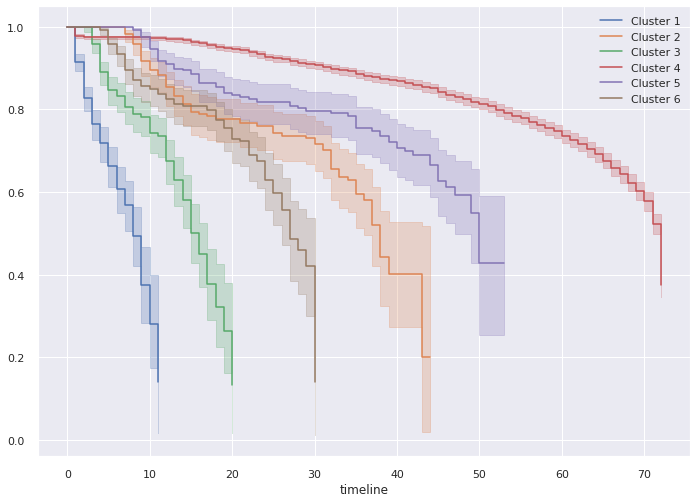

In [ ]:
experimento_2(df_preprocessed_exp_2)

* O cluster 1 apresentou a menor curva de sobrevivência em relação a todas as outras. 
* Em um ano, a taxa de retenção mínima do cluster 1 diminuiu para quase 0.

In [ ]:
perfil_do_cliente(Cluster=1)

,Receita mensal,Receita total,Contrato,Meses de permanência
count,357.00,357.00,357.00,357.00
mean,5001.13,67636.53,1.10,19.13
std,2670.29,6042.07,0.59,11.42
min,1895.00,57900.00,0.00,6.00
25%,2055.00,62290.00,1.00,9.00
50%,5020.00,67065.00,1.00,13.00
75%,7425.00,73130.00,1.00,32.00
max,10990.00,78425.00,2.00,44.00


* Contrato: Mês-a-mês (25% a 75%).

* Receita mensal: 
  * Entre 2055 até 7425 reais (de 25% até 75%).
  * No mínimo, a receita mensal do cluster 1 é de **1895 reais**.

* Receita total: 
  * Entre **62.290 até 73.130 reais** (de 25% até 75%).
  * No mínimo, uma receita total de **57.900 reais.**
* Meses de permanência: 
  * Entre **9 a 32 meses** (de 25% até 75%).
  * No mínimo o cliente permanece **6 meses** na plataforma.

### Sintetizar e compartilhar

* Cluster 1 na curva de sobrevivência: 
  * Apresentou a menor curva de sobrevivência em relação a todas as outras.
  * Em um ano, a taxa de retenção mínima do cluster 1 diminuiu para quase 0.
  * Em 10 meses, a taxa de retenção mínima ficou entre 30 a 40%.
* Cluster 1 e perfil do cliente:
  * Contrato: Mês-a-mês (25% a 75%).
  * Receita mensal:
    * Entre 2055 até 7425 reais (de 25% até 75%).
    * No mínimo, a receita mensal do cluster 1 é de 1895 reais.
  * Receita total:
    * Entre 62.290 até 73.130 reais (de 25% até 75%).
    * No mínimo, uma receita total de 57.900 reais.
    * Meses de permanência:
    * Entre 9 a 32 meses (de 25% até 75%).
    * No mínimo o cliente permanece 6 meses na
      plataforma.

* **Hipótese não rejeitada**: existe um perfil de cliente com uma taxa de retenção mínima abaixo de 50% nos primeiros 12 meses.